In [2]:
import numpy as np
import scipy.stats as stats
from scipy.signal import peak_widths, find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [120]:
class DynaToy:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.layers = [np.zeros([m, 1]) for m in self.layer_sizes]

        self.r = np.concatenate(self.layers)
        self.W = np.zeros([len(self.r), len(self.r)])

        self.in_idx = np.arange(0, layer_sizes[0])
        self.out_idx = np.arange(len(self.r) - layer_sizes[-1], len(self.r))

    
    def init_weights(self, kappas = [], plot = False):
        W = np.zeros_like(self.W)

        if not kappas:
            self.kappas = [1 for i in range(len(self.layer_sizes))]
        else:
            self.kappas = kappas

        for i in range(len(self.layer_sizes) - 1):
            rstart = int(np.sum(self.layer_sizes[:(i+1)]))
            rstop = rstart + self.layer_sizes[i+1]

            cstart = int(np.sum(self.layer_sizes[:i]))
            cstop = cstart + self.layer_sizes[i]

            shape = (self.layer_sizes[i+1], self.layer_sizes[i])

            W_l = np.zeros(shape)
            x = np.linspace(0, 2*np.pi, shape[1])

            for ii in range(shape[0]):
                loc = ((ii/shape[0]) * 2*np.pi)
                W_l[ii, :] = stats.vonmises.pdf(x, self.kappas[i], loc)
            W_l /= W_l.max()
            W[rstart:rstop, cstart:cstop] = W_l
            W[cstart:cstop, rstart:rstop] = W_l.T

        if plot:
            plt.imshow(W)

        return W



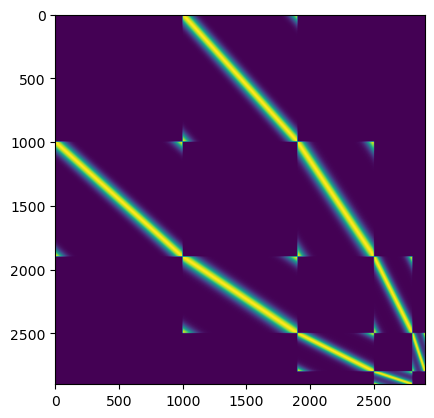

In [121]:
layer_sizes = [1000, 900, 600, 300, 100]

model = DynaToy(layer_sizes)
model.W = model.init_weights(kappas = [10, 5, 3, 1], plot=True)